# libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse

import pmdarima as pm
from pmdarima.datasets import load_sunspots
from pmdarima.model_selection import train_test_split
from pmdarima.utils.visualization import tsdisplay
from pmdarima.preprocessing import LogEndogTransformer, BoxCoxEndogTransformer
from pmdarima.pipeline import Pipeline
print(f"Using pmdarima {pm.__version__}")

Using pmdarima 1.8.5


# data

In [76]:
y = load_sunspots(as_series = True)
print(y.head())
print(f"\ny shape: {y.shape}")

Jan 1749    58.0
Feb 1749    62.6
Mar 1749    70.0
Apr 1749    55.7
May 1749    85.0
dtype: float64

y shape: (2820,)


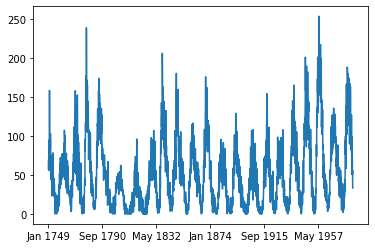

In [79]:
y.plot();

## data split

In [80]:
train_len = 2750
y_train, y_test = train_test_split(y, train_size = train_len)
print(y_train.head())
print(f"\ny_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Jan 1749    58.0
Feb 1749    62.6
Mar 1749    70.0
Apr 1749    55.7
May 1749    85.0
dtype: float64

y_train shape: (2750,)
y_test shape: (70,)


## train and test data display

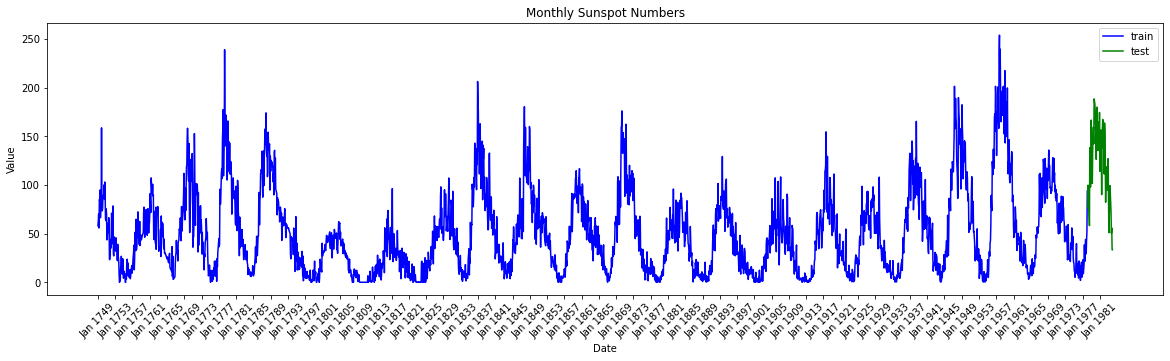

In [81]:
plt.figure(figsize = (20, 5))
plt.plot(y_train, c = "blue", label = "train")
plt.plot(y_test, c = "green", label = "test")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(np.arange(0, 2820, 48), y.index[0:2820:48], rotation = 45)
plt.legend()
plt.title("Monthly Sunspot Numbers")
plt.show()

## data eda

/Users/zfwang/.pyenv/versions/ts/lib/python3.7/site-packages/pmdarima/utils/visualization.py:223: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  vlines_kwargs=vlines_kwargs, **kwargs)


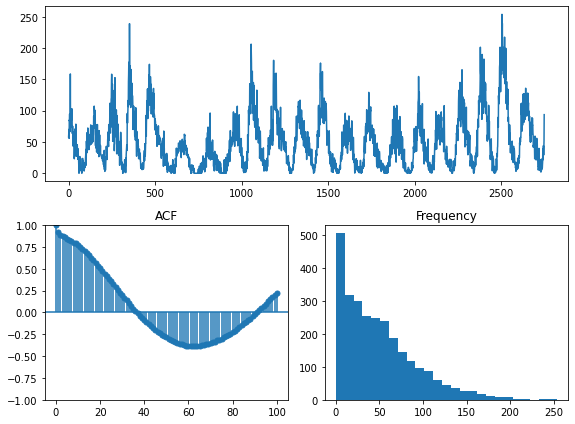

In [82]:
tsdisplay(y_train, lag_max = 100)

# baseline

In [83]:
fit1 = pm.auto_arima(y_train, m = 12, trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=12.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=23347.880, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=23087.391, Time=0.77 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=22931.725, Time=2.33 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=23345.881, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=22934.181, Time=0.70 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=22932.273, Time=4.78 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=22931.192, Time=8.94 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=22930.266, Time=22.93 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=35.92 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=22930.023, Time=11.08 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=22931.070, Time=4.96 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=22932.010, Time=1.48 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=23336.203, Time=6.85 sec
 ARIMA(1,1,1)

In [84]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2750
Model:             SARIMAX(4, 1, 2)x(2, 0, [], 12)   Log Likelihood              -11403.931
Date:                             Tue, 14 Mar 2023   AIC                          22825.862
Time:                                     17:18:09   BIC                          22879.133
Sample:                                          0   HQIC                         22845.109
                                            - 2750                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3900      0.026     53.565      0.000       1.339       1.441
ar.L2         -0.3918      0.028    -14.050      0.000      -0.446      -0.337
ar.L3         -0.0085      0.025     -0.335      0.738      -0.058       0.041
ar.L4         -0.0356      0.018     -1.997      0.046      -0.070      -0.001
ma.L1         -1.8194      0.021    -87.216      0.000      -1.860      -1.778
ma.L2          0.8548      0.021     40.010      0.000       0.813       0.897
ar.S.L12       0.0032      0.017      0.190      0.849      -0.030       0.037
ar.S.L24      -0.0481      0.017     -2.763      0.006      -0.082      -0.014
sigma2       234.7849      3.986     58.902      0.000     226.972     242.597
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1241.92
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# data transform

/Users/zfwang/.pyenv/versions/ts/lib/python3.7/site-packages/pmdarima/utils/visualization.py:223: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  vlines_kwargs=vlines_kwargs, **kwargs)


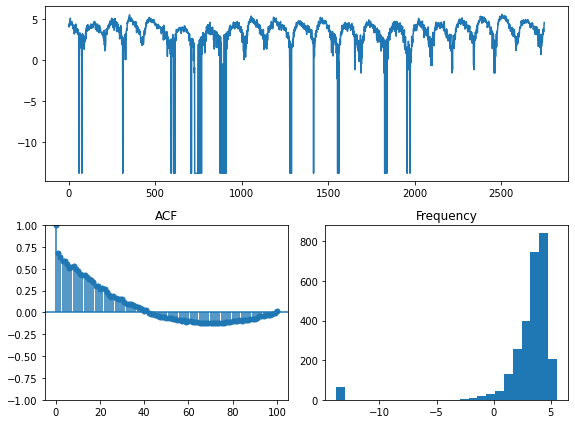

In [85]:
y_train_log, _ = LogEndogTransformer(lmbda = 1e-6).fit_transform(y_train)
tsdisplay(y_train_log, lag_max = 100)

/Users/zfwang/.pyenv/versions/ts/lib/python3.7/site-packages/pmdarima/utils/visualization.py:223: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  vlines_kwargs=vlines_kwargs, **kwargs)


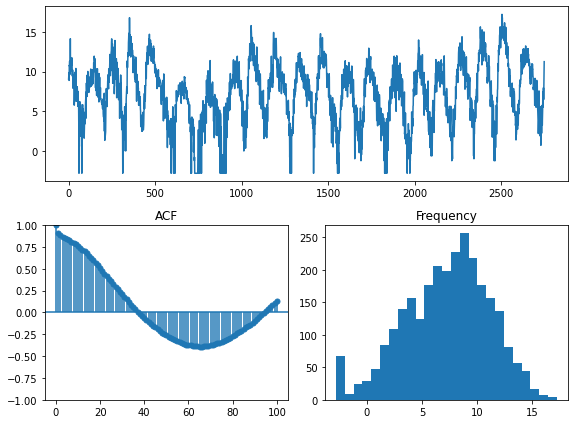

In [86]:
y_train_bc, _ = BoxCoxEndogTransformer(lmbda2 = 1e-6).fit_transform(y_train)
tsdisplay(y_train_bc, lag_max = 100)

In [87]:
from scipy.stats import normaltest

normaltest(y_train_bc)

NormaltestResult(statistic=61.82832825293428, pvalue=3.751017646057429e-14)

# model fit

In [88]:
fit2 = Pipeline([
    ("boxcox", BoxCoxEndogTransformer(lmbda2 = 1e-6)),
    ("arima", pm.AutoARIMA(trace = True, suppress_warnings = True, m = 12))
])
fit2.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=5.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10560.255, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10190.842, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=10000.189, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10558.255, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=9998.955, Time=0.19 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=10000.226, Time=0.44 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=10000.401, Time=1.46 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=9985.703, Time=0.30 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=9985.956, Time=0.79 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=9985.855, Time=0.95 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=9985.704, Time=2.41 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=10189.020, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=9986.300, Time=0.58 sec
 ARIMA(1,1,2)(0,0

Pipeline(steps=[('boxcox', BoxCoxEndogTransformer(lmbda2=1e-06)),
                ('arima', AutoARIMA(m=12, trace=True))])

In [89]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2750
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -4988.501
Date:                Tue, 14 Mar 2023   AIC                           9983.001
Time:                        17:19:09   BIC                          10000.758
Sample:                             0   HQIC                          9989.417
                               - 2750                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4787      0.015    -32.573      0.000      -0.507      -0.450
ma.L2         -0.0720      0.015     -4.689      0.000      -0.102      -0.042
sigma2         2.2063      0.045     49.252      0.000       2.119       2.294
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               310.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
def plot_forecasts(forecasts, title, figsize=(8, 12)):
    x = np.arange(y_train.shape[0] + forecasts.shape[0])

    fig, axes = plt.subplots(2, 1, sharex=False, figsize=figsize)

    # Plot the forecasts
    axes[0].plot(x[:y_train.shape[0]], y_train, c='b')
    axes[0].plot(x[y_train.shape[0]:], forecasts, c='g')
    axes[0].set_xlabel(f'Sunspots (RMSE={np.sqrt(mse(y_test, forecasts)):.3f})')
    axes[0].set_title(title)

    # Plot the residuals
    resid = y_test - forecasts
    _, p = normaltest(resid)
    axes[1].hist(resid, bins=15)
    axes[1].axvline(0, linestyle='--', c='r')
    axes[1].set_title(f'Residuals (p={p:.3f})')

    plt.tight_layout()
    plt.show()

In [91]:
forecast1 = fit1.predict(y_test.shape[0])
forecast2 = fit2.predict(y_test.shape[0])

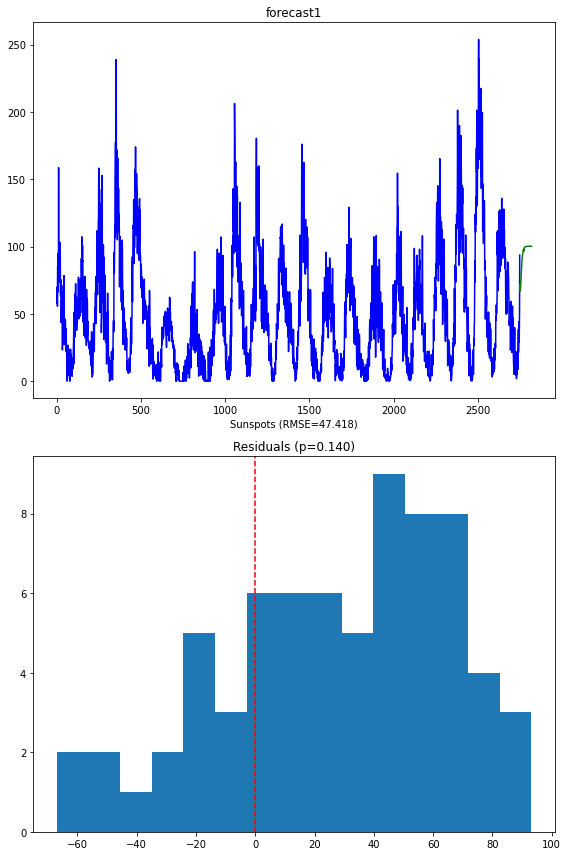

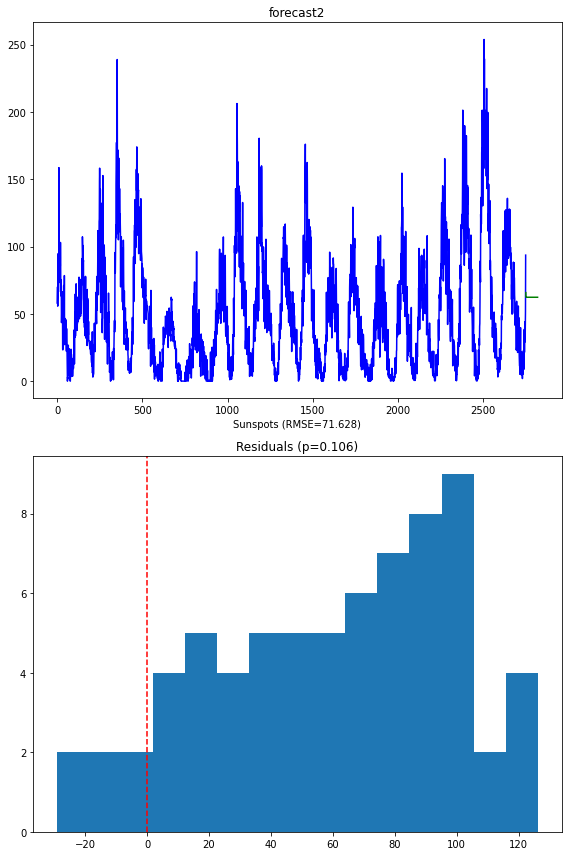

In [92]:
plot_forecasts(forecast1, "forecast1")
plot_forecasts(forecast2, "forecast2")